<a href="https://colab.research.google.com/github/Giaokeo/Giaokeo-Detection-fifty-insect-species/blob/main/Detection_fifty_insect_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/50LoaiConTrung/Training',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/50LoaiConTrung/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 6863 images belonging to 50 classes.
Found 1828 images belonging to 50 classes.


In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=35,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/35
2288/2288 [==============================] - 37s 16ms/step - loss: 3.8973 - accuracy: 0.0291 - val_loss: 3.8539 - val_accuracy: 0.0290
Epoch 2/35
2288/2288 [==============================] - 37s 16ms/step - loss: 3.6641 - accuracy: 0.0611 - val_loss: 3.5822 - val_accuracy: 0.0793
Epoch 3/35
2288/2288 [==============================] - 36s 16ms/step - loss: 3.3194 - accuracy: 0.1195 - val_loss: 3.0412 - val_accuracy: 0.1969
Epoch 4/35
2288/2288 [==============================] - 35s 15ms/step - loss: 3.0156 - accuracy: 0.1887 - val_loss: 2.7892 - val_accuracy: 0.2500
Epoch 5/35
2288/2288 [==============================] - 35s 15ms/step - loss: 2.7518 - accuracy: 0.2489 - val_loss: 2.5302 - val_accuracy: 0.3162
Epoch 6/35
2288/2288 [==============================] - 35s 15ms/step - loss: 2.5311 - accuracy: 0.3073 - val_loss: 2.2441 - val_accuracy: 0.3879
Epoch 7/35
2288/2288 [==============================] - 36s 16ms/step - loss: 2.3135 - accuracy: 0.3618 - val_loss: 2.0025 -

In [ ]:
model.save('/content/drive/MyDrive/Save Model/NhanDien50LoaiConTrung91%')
model= load_model('/content/drive/MyDrive/Save Model/NhanDien50LoaiConTrung91%')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Save Model/NhanDien50LoaiConTrung91%/assets


In [ ]:
dir_path='//content/drive/MyDrive/50LoaiConTrung/Testing'

for i in os.listdir(dir_path):
  print(i)

11.jpg
10.jpg
12.jpg
3.jpg
15.jpg
8.jpg
16.jpg
7.jpg
1.jpg
17.jpg
2.jpg
5.jpg
19.jpg
14.jpg
18.jpg
4.jpg
6.jpg
9.jpg
13.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg


In [ ]:
validation_dataset.class_indices

{'Ant': 0,
 'Atractomorpha lata (cào cào đầu nhọn)': 1,
 'Beetles Tiger': 2,
 'Black butterfly': 3,
 'Blue Butterfly': 4,
 'Bristletail': 5,
 'Centipede': 6,
 'Chinch cimex (lectalarius)': 7,
 'Cicada': 8,
 'Cockroaches': 9,
 'Cricket Weta': 10,
 'Crickets': 11,
 'Dermestidae( bọ cánh cứng tròn)': 12,
 'Dragonfly': 13,
 'Dryocampa Rubicunda( bướm đêm phong hồng)': 14,
 'Firefly': 15,
 'Flies': 16,
 'Girinidae( bọ rẽ nước)': 17,
 'Grasshopper(Schistocerca gregaria)': 18,
 'Hairy worms': 19,
 'Hercules Beetle': 20,
 'Honeybee': 21,
 'Hummingbird': 22,
 'Jewel beetle': 23,
 'Ladybird': 24,
 'Lantern beetle': 25,
 'Leptinotarsa decemlineata (bọ cánh cứng sọc)': 26,
 'Louse': 27,
 'Maggots': 28,
 'Mantis': 29,
 'Mayfly': 30,
 'Mole cricket': 31,
 'Mosquito': 32,
 'Orchid mantis': 33,
 'Plocaederus': 34,
 'Saddleback': 35,
 'Scorpion': 36,
 'Scorpionflies': 37,
 'Spider (nhện quá phụ đen)': 38,
 'Stag Beetles': 39,
 'Stick insect': 40,
 'Stink bug': 41,
 'Termit

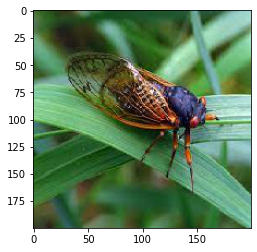

Cicada


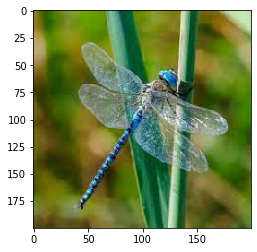

Dragonfly


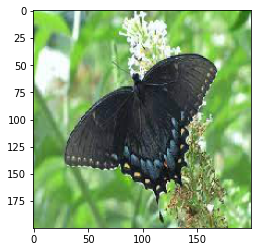

Black butterfly


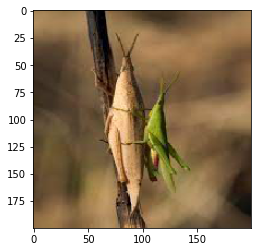

Atractomorpha lata (cào cào đầu nhọn)


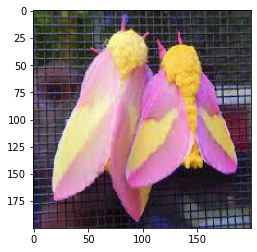

Dryocampa Rubicunda(BDPH)


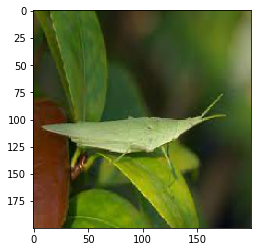

Atractomorpha lata (cào cào đầu nhọn)


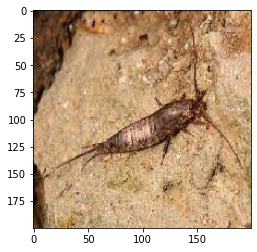

Chinch cimex(lectalarius)


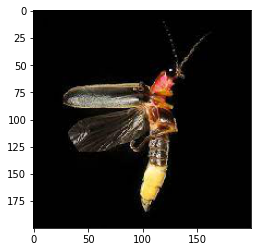

Firefly


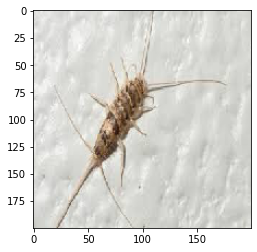

Crickets


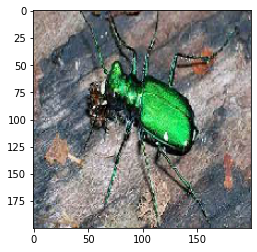

Beetles Tiger


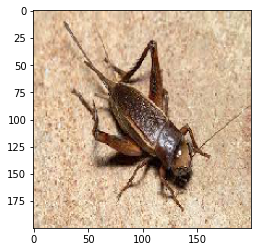

Crickets


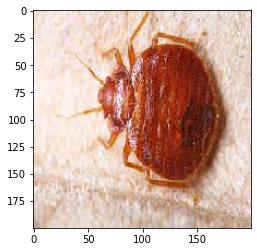

Chinch cimex(lectalarius)


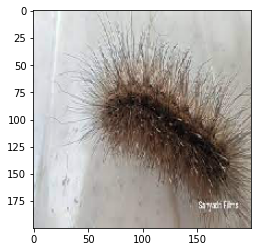

Hairy worms


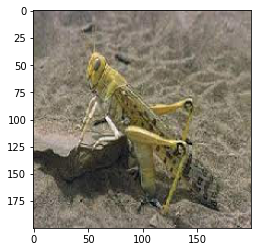

Grasshopper(Schistocerca gregaria)


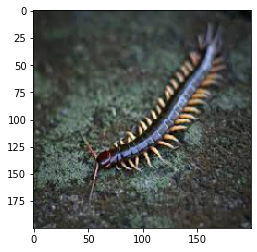

Hercules beetle


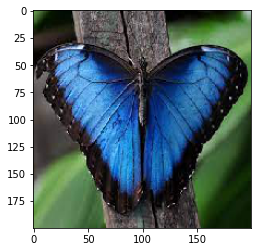

Blue butterfly


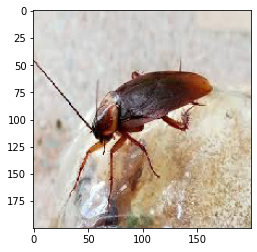

Centipede


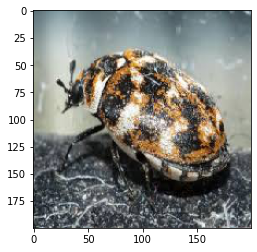

leptinotarsa decemlineata(bo canh cung soc)


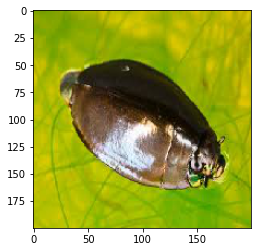

Honeybee


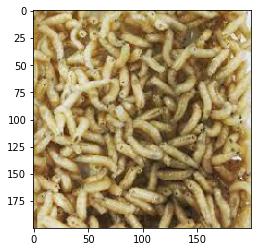

Maggots


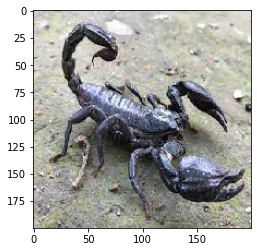

Scorpion


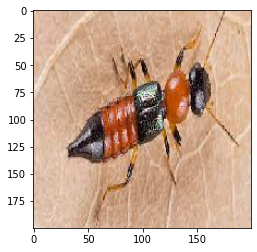

Three-chamber ant


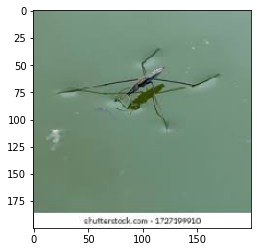

Water spider


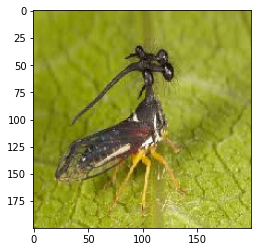

Treehopper Brazilian


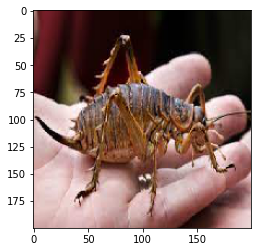

Cricket Weta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/50LoaiConTrung/Testing'

for i in range (25):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Ant")
    elif predict==1: 
      print("Atractomorpha lata (cào cào đầu nhọn)")
    elif predict==2: 
      print("Beetles Tiger")
    elif predict==3: 
      print("Black butterfly")
    elif predict==4: 
      print("Blue butterfly")
    elif predict==5: 
      print("Bristletail")
    elif predict==6: 
      print("Centipede")
    elif predict==7: 
      print("Chinch cimex(lectalarius)")
    elif predict==8: 
      print("Cicada")
    elif predict==9: 
      print("Cockroaches")
    elif predict==10: 
      print("Cricket Weta")
    elif predict==11: 
      print("Crickets")
    elif predict==12: 
      print("Dermestidae(BCCT)")
    elif predict==13: 
      print("Dragonfly")
    elif predict==14: 
      print("Dryocampa Rubicunda(BDPH)")
    elif predict==15: 
      print("Firefly")
    elif predict==16: 
      print("Flies")
    elif predict==17: 
      print("Girinidae(Bo re nuoc)")
    elif predict==18: 
      print("Grasshopper(Schistocerca gregaria)")
    elif predict==19: 
      print("Hairy worms")
    elif predict==20: 
      print("Hercules beetle")
    elif predict==21: 
      print("Honeybee")
    elif predict==22: 
      print("Hummingbird")
    elif predict==23: 
      print("Jewel beetle")
    elif predict==24: 
      print("Ladybird")
    elif predict==25: 
      print("Lantern beetle")
    elif predict==26: 
      print("leptinotarsa decemlineata(bo canh cung soc)")
    elif predict==27: 
      print("Louse")
    elif predict==28: 
      print("Maggots")
    elif predict==29: 
      print("Mantis")
    elif predict==30: 
      print("Mayfly")
    elif predict==31: 
      print("Mole cricket")
    elif predict==32: 
      print("Mosquito")
    elif predict==33: 
      print("Orchid mantis")
    elif predict==34: 
      print("Plocaederus")
    elif predict==35: 
      print("Saddleback")
    elif predict==36: 
      print("Scorpion")
    elif predict==37: 
      print("Scorpionflies")
    elif predict==38: 
      print("Spider(nhen qua phu den)")
    elif predict==39: 
      print("Stag beetle")
    elif predict==40: 
      print("Stick insect")
    elif predict==41: 
      print("Stink bug")
    elif predict==42: 
      print("Termite")
    elif predict==43: 
      print("Thorn bug")
    elif predict==44: 
      print("Three-chamber ant")
    elif predict==45: 
      print("Treehopper Brazilian")
    elif predict==46: 
      print("Water scorpion")
    elif predict==47: 
      print("Water spider")
    elif predict==48: 
      print("Worm(Spicebush)")       
    elif predict==49: 
      print("Yellow butterfly")
    
                                      

        

Cricket Weta


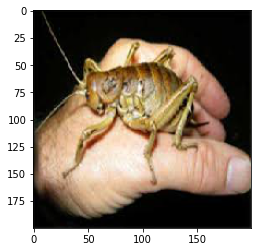

In [ ]:
    from keras.preprocessing.image import  load_img,img_to_array
    import numpy as np

    filename = 'images (7).jpg'
    img = load_img(filename,target_size=(200,200))
    img.size
    plt.imshow(img)
    img=img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Ant")
    elif predict==1: 
      print("Atractomorpha lata (cào cào đầu nhọn)")
    elif predict==2: 
      print("Beetles Tiger")
    elif predict==3: 
      print("Black butterfly")
    elif predict==4: 
      print("Blue butterfly")
    elif predict==5: 
      print("Bristletail")
    elif predict==6: 
      print("Centipede")
    elif predict==7: 
      print("Chinch cimex(lectalarius)")
    elif predict==8: 
      print("Cicada")
    elif predict==9: 
      print("Cockroaches")
    elif predict==10: 
      print("Cricket Weta")
    elif predict==11: 
      print("Crickets")
    elif predict==12: 
      print("Dermestidae(BCCT)")
    elif predict==13: 
      print("Dragonfly")
    elif predict==14: 
      print("Dryocampa Rubicunda(BDPH)")
    elif predict==15: 
      print("Firefly")
    elif predict==16: 
      print("Flies")
    elif predict==17: 
      print("Girinidae(Bo re nuoc)")
    elif predict==18: 
      print("Grasshopper(Schistocerca gregaria)")
    elif predict==19: 
      print("Hairy worms")
    elif predict==20: 
      print("Hercules beetle")
    elif predict==21: 
      print("Honeybee")
    elif predict==22: 
      print("Hummingbird")
    elif predict==23: 
      print("Jewel beetle")
    elif predict==24: 
      print("Ladybird")
    elif predict==25: 
      print("Lantern beetle")
    elif predict==26: 
      print("leptinotarsa decemlineata(bo canh cung soc)")
    elif predict==27: 
      print("Louse")
    elif predict==28: 
      print("Maggots")
    elif predict==29: 
      print("Mantis")
    elif predict==30: 
      print("Mayfly")
    elif predict==31: 
      print("Mole cricket")
    elif predict==32: 
      print("Mosquito")
    elif predict==33: 
      print("Orchid mantis")
    elif predict==34: 
      print("Plocaederus")
    elif predict==35: 
      print("Saddleback")
    elif predict==36: 
      print("Scorpion")
    elif predict==37: 
      print("Scorpionflies")
    elif predict==38: 
      print("Spider(nhen qua phu den)")
    elif predict==39: 
      print("Stag beetle")
    elif predict==40: 
      print("Stick insect")
    elif predict==41: 
      print("Stink bug")
    elif predict==42: 
      print("Termite")
    elif predict==43: 
      print("Thorn bug")
    elif predict==44: 
      print("Three-chamber ant")
    elif predict==45: 
      print("Treehopper Brazilian")
    elif predict==46: 
      print("Water scorpion")
    elif predict==47: 
      print("Water spider")
    elif predict==48: 
      print("Worm(Spicebush)")       
    elif predict==49: 
      print("Yellow butterfly")  

In [ ]:
np.argmax(model.predict(img),axis=1)

array([10])